<a href="https://colab.research.google.com/github/SimreAniri/Neural-Networks/blob/master/Lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Concatenate

from tensorflow.keras.utils import plot_model 

In [2]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20

In [4]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [5]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 35s 20ms/step - loss: 2.0326 - accuracy: 0.2470 - val_loss: 1.5793 - val_accuracy: 0.4367
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6435 - accuracy: 0.4007 - val_loss: 1.4053 - val_accuracy: 0.4925
Epoch 3/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5123 - accuracy: 0.4494 - val_loss: 1.3070 - val_accuracy: 0.5344
Epoch 4/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4154 - accuracy: 0.4911 - val_loss: 1.2484 - val_accuracy: 0.5591
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2226 - accuracy: 0.5727
Test loss: 1.2225855588912964
Test accuracy: 0.572700023651123


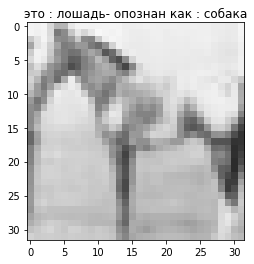

In [8]:
N = 83
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [9]:
x_train.shape[1:]

(32, 32, 3)

Попробуем сделать несколько нитей:

In [10]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x11)
x11 = Conv2D(64, (3, 3), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


x22 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (3, 3), padding='same', activation='relu')(x22)
x22 = Conv2D(64, (3, 3), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)

merge_one = Concatenate()([first, second])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model2 = Model(inputs=first_input, outputs=x)

In [11]:
# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

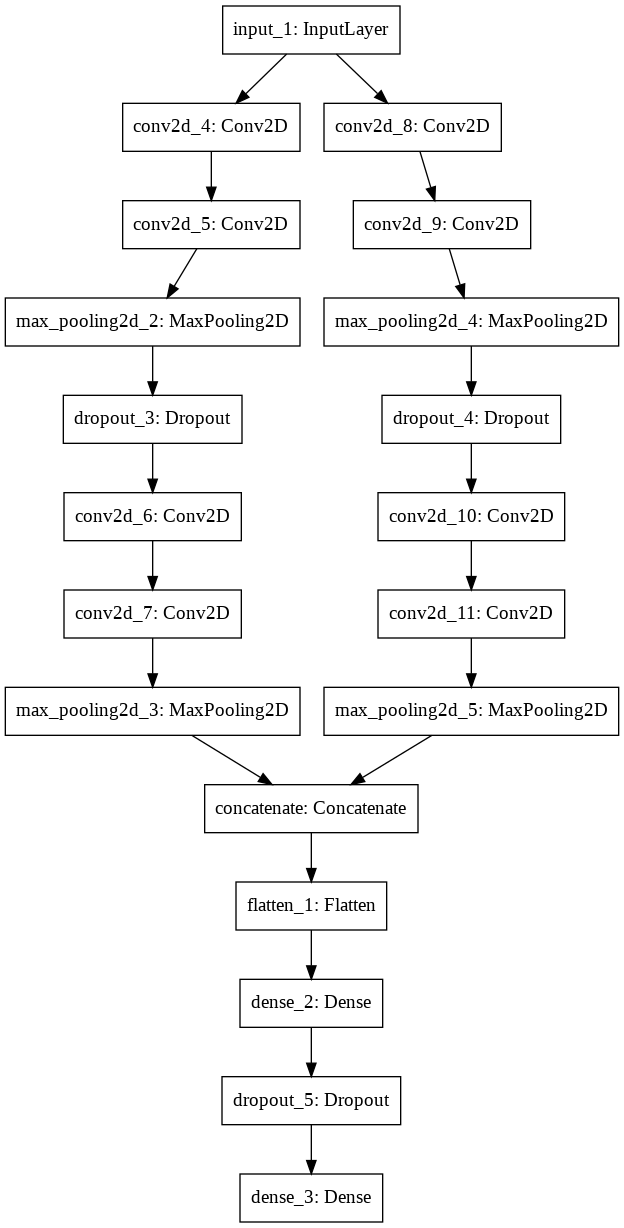

In [12]:
plot_model(model2, 'model2.png')

In [13]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 30, 30, 32)   9248        conv2d_4[0][0]                   
______________________________________________________________________________________________

In [14]:
data_augmentation = False

In [15]:
batch_size = 32
num_classes = 10
epochs = 5
num_predictions = 20

In [21]:
if not data_augmentation:
    print('Не используется data augmentation')
    model2.fit(x_train, y_train, 
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)
    
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Не используется data augmentation
Epoch 1/5


TypeError: ignored

In [ ]:
# проверка работы обученной модели
scores = model2.evaluate([x_test, x_test], y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
N = 83
y_p=model2.predict([x_test[N:N+1][:,:,:], x_test[N:N+1][:,:,:]])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x11)
x11 = Conv2D(128, (3, 3), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


second_input = Input(shape=x_train.shape[1:])
x22 = Conv2D(32, (3, 3), padding='same', activation='relu')(second_input)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (3, 3), padding='same', activation='relu')(x22)
x22 = Conv2D(128, (3, 3), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)

merge_one = Concatenate()([first, second])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model3 = Model(inputs=[first_input, second_input], outputs=x)

In [ ]:
# компиляция модели
model3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
print('Не используется data augmentation')
model3.fit([x_train, x_train], y_train, 
            batch_size=batch_size,
            epochs=epochs,
            validation_data=([x_test, x_test], y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1479 - accuracy: 0.1974 - val_loss: 1.7859 - val_accuracy: 0.3584
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7453 - accuracy: 0.3751 - val_loss: 1.5327 - val_accuracy: 0.4560
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5327 - accuracy: 0.4466 - val_loss: 1.3896 - val_accuracy: 0.5031
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4009 - accuracy: 0.4975 - val_loss: 1.2520 - val_accuracy: 0.5593
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2812 - accuracy: 0.5459 - val_loss: 1.1637 - val_accuracy: 0.5951


In [ ]:
# проверка работы обученной модели
scores = model3.evaluate([x_test, x_test], y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.1637 - accuracy: 0.5951
Test loss: 1.1637399196624756
Test accuracy: 0.5950999855995178


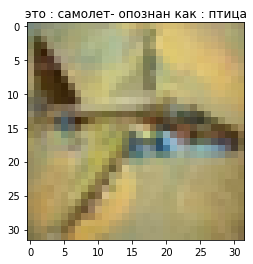

In [ ]:
N = 919
y_p=model3.predict([x_test[N:N+1][:,:,:], x_test[N:N+1][:,:,:]])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Есть небольшой рост метрики от увеличения ширины слоев

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (3, 3), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x11)
x11 = Conv2D(64, (3, 3), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


second_input = Input(shape=x_train.shape[1:])
x22 = Conv2D(32, (3, 3), padding='same', activation='relu')(second_input)
x22 = Conv2D(32, (3, 3), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (3, 3), padding='same', activation='relu')(x22)
x22 = Conv2D(64, (3, 3), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)

third_input = Input(shape=x_train.shape[1:])
x33 = Conv2D(32, (3, 3), padding='same', activation='relu')(third_input)
x33 = Conv2D(32, (3, 3), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Conv2D(64, (3, 3), padding='same', activation='relu')(x33)
x33 = Conv2D(64, (3, 3), activation='relu')(x33)
third = MaxPooling2D(pool_size=(2, 2))(x33)


merge_one = Concatenate()([first, second, third])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model4 = Model(inputs=[first_input, second_input, third_input], outputs=x)

In [ ]:
# компиляция модели
model4.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
print('Не используется data augmentation')
model4.fit([x_train, x_train, x_train], y_train, 
            batch_size=batch_size,
            epochs=epochs,
            validation_data=([x_test, x_test, x_test], y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.1628 - accuracy: 0.1919 - val_loss: 1.7500 - val_accuracy: 0.3865
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7313 - accuracy: 0.3777 - val_loss: 1.4705 - val_accuracy: 0.4676
Epoch 3/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4937 - accuracy: 0.4644 - val_loss: 1.3313 - val_accuracy: 0.5212
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3498 - accuracy: 0.5163 - val_loss: 1.1869 - val_accuracy: 0.5795
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2331 - accuracy: 0.5627 - val_loss: 1.1262 - val_accuracy: 0.6035


In [ ]:
# проверка работы обученной модели
scores = model4.evaluate([x_test, x_test, x_test], y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.1262 - accuracy: 0.6035
Test loss: 1.1262311935424805
Test accuracy: 0.6035000085830688


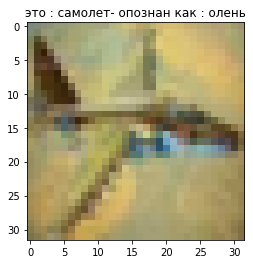

In [ ]:
N = 919
y_p=model4.predict([x_test[N:N+1][:,:,:], x_test[N:N+1][:,:,:], x_test[N:N+1][:,:,:]])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Дополнительная ветвь улудшила метрику

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11 = Conv2D(32, (5, 5), padding='same', activation='relu')(first_input)
x11 = Conv2D(32, (5, 5), activation='relu')(x11)
x11 = MaxPooling2D(pool_size=(2, 2))(x11)
x11 = Dropout(0.25)(x11)

x11 = Conv2D(32, (5, 5), padding='same', activation='relu')(x11)
x11 = Conv2D(32, (5, 5), activation='relu')(x11)
first = MaxPooling2D(pool_size=(2, 2))(x11)


second_input = Input(shape=x_train.shape[1:])
x22 = Conv2D(64, (5, 5), padding='same', activation='relu')(second_input)
x22 = Conv2D(64, (5, 5), activation='relu')(x22)
x22 = MaxPooling2D(pool_size=(2, 2))(x22)
x22 = Dropout(0.25)(x22)

x22 = Conv2D(64, (5, 5), padding='same', activation='relu')(x22)
x22 = Conv2D(64, (5, 5), activation='relu')(x22)
second = MaxPooling2D(pool_size=(2, 2))(x22)

third_input = Input(shape=x_train.shape[1:])
x33 = Conv2D(64, (5, 5), padding='same', activation='relu')(third_input)
x33 = Conv2D(64, (5, 5), activation='relu')(x33)
x33 = MaxPooling2D(pool_size=(2, 2))(x33)
x33 = Dropout(0.25)(x33)

x33 = Conv2D(128, (5, 5), padding='same', activation='relu')(x33)
x33 = Conv2D(128, (5, 5), activation='relu')(x33)
third = MaxPooling2D(pool_size=(2, 2))(x33)


merge_one = Concatenate()([first, second, third])

x = Flatten()(merge_one)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model5 = Model(inputs=[first_input, second_input, third_input], outputs=x)

In [ ]:
# компиляция модели
model5.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
print('Не используется data augmentation')
model5.fit([x_train, x_train, x_train], y_train, 
            batch_size=batch_size,
            epochs=epochs,
            validation_data=([x_test, x_test, x_test], y_test),
            shuffle=True)

Не используется data augmentation
Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 2.1305 - accuracy: 0.2090 - val_loss: 1.6628 - val_accuracy: 0.4076
Epoch 2/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.6215 - accuracy: 0.4136 - val_loss: 1.4102 - val_accuracy: 0.4957
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4265 - accuracy: 0.4858 - val_loss: 1.4286 - val_accuracy: 0.4955
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2979 - accuracy: 0.5399 - val_loss: 1.2774 - val_accuracy: 0.5499
Epoch 5/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.2009 - accuracy: 0.5764 - val_loss: 1.0976 - val_accuracy: 0.6090


In [ ]:
# проверка работы обученной модели
scores = model5.evaluate([x_test, x_test, x_test], y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.0976 - accuracy: 0.6090
Test loss: 1.0976313352584839
Test accuracy: 0.609000027179718


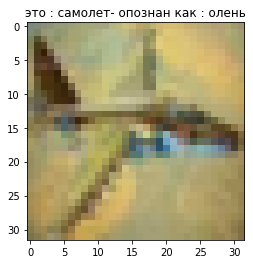

In [ ]:
N = 919
y_p=model5.predict([x_test[N:N+1][:,:,:], x_test[N:N+1][:,:,:], x_test[N:N+1][:,:,:]])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Попробуем дообучить последний вариант сети

In [ ]:
epochs = 5

In [ ]:
print('Использование data augmentation в реальном времени')
# Препроцессинг и data augmentation в реальном времени:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

# запуск data augmentation через fit_generator
model5.fit_generator(datagen.flow([x_train, x_train, x_train], y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=([x_test, x_test, x_test], y_test),
                    workers=4)

Использование data augmentation в реальном времени
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

Что-то никак не могу понять, почему он не хочет работать на 3 ветках. На 2 же работал...

 

---

---





В процессе выполнения возникли вопросы.

1. Почему не стоит делать слой конкотинации сразу после слоев Dropout (сеть вылетает с ошибкой)?

2. Попыталась сделать 2 подряд слоя конволюции с понижением количества нейронов (128 -> 64), тоже начал странно ругаться. Причину не нашла.

3. Да и в принципе так и не нашла вариант, который принципиально мог бы повысить точность(((